In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [2]:
RANDOM_STATE = 7
np.random.seed(RANDOM_STATE)

## Loading Dataset

In [3]:
x=pd.read_csv('featuredataset.csv', sep='\t')
y=pd.read_csv('targetdataset.csv', sep='\t')

In [4]:
x.head()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,5,2.5,2.5,2.5,2.0,0.0,14.0,22.0,17.0
1,5.0,5,2.5,2.5,2.5,2.0,1.0,14.0,19.0,4.0
2,4.0,5,3.0,2.5,2.5,2.0,1.0,10.0,20.0,4.0
3,3.0,4,2.5,2.5,2.5,2.0,1.0,8.0,22.0,6.0
4,3.0,6,3.0,4.0,2.5,2.0,1.0,10.0,20.0,27.0


In [5]:
target_name = ["house_price"]
features_names = ["area", "amenities", "floors", "bedrooms", "bathrooms", "property_type", "selling_type", "road_size", "road_type", "location_two"]

In [6]:
x.head()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
0,19.0,5,2.5,2.5,2.5,2.0,0.0,14.0,22.0,17.0
1,5.0,5,2.5,2.5,2.5,2.0,1.0,14.0,19.0,4.0
2,4.0,5,3.0,2.5,2.5,2.0,1.0,10.0,20.0,4.0
3,3.0,4,2.5,2.5,2.5,2.0,1.0,8.0,22.0,6.0
4,3.0,6,3.0,4.0,2.5,2.0,1.0,10.0,20.0,27.0


In [34]:
x.describe()

,area,amenities,floors,bedrooms,bathrooms,property_type,selling_type,road_size,road_type,location_two
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,7.055171,5.354378,2.652074,4.293779,3.457604,1.943318,0.828111,15.263594,19.205069,13.817051
std,8.774563,2.432537,0.736431,2.039034,1.428018,0.329877,0.377371,26.676859,2.849194,6.977021
min,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,4.000000,2.500000,2.500000,2.500000,2.000000,1.000000,12.000000,19.000000,6.000000
50%,4.312500,5.000000,2.500000,4.000000,3.000000,2.000000,1.000000,13.000000,19.000000,15.000000
75%,6.000000,6.000000,2.500000,5.000000,4.000000,2.000000,1.000000,16.000000,20.000000,17.000000
max,106.501096,23.000000,8.500000,15.000000,15.000000,2.000000,1.000000,1222.000000,22.000000,28.000000


In [35]:
y.describe()

,house_price
count,2.170000e+03
mean,3.447185e+07
std,4.132992e+07
min,5.000000e+01
25%,1.600000e+07
50%,2.750000e+07
75%,4.175269e+07
max,9.200000e+08


In [36]:
y.head()

,house_price
0,7.500000e+04
1,4.175269e+07
2,2.900000e+07
3,1.750000e+07
4,1.700000e+07


## Split Dataset

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)

In [9]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [10]:
ytrain = np.array(y_train)
ytest = np.array(y_test)

ytrain = ytrain.reshape(-1, 1)
ytest = ytest.reshape(-1, 1)

In [11]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

def accuracy_check(y, y_pred):
    
    mae = mean_absolute_error(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    
    print("MAE : ", mae, " RMSE : ", rmse,)

In [12]:
def rmse_cv(model):
    rmse = np.sqrt(-cross_val_score(model, x, y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse
    

def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

# Model
Different models are used for testing out which gives the best results.

### Linear Regression

In [13]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)

print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20425193.2797792
MSE: 817486596599777.8
RMSE: 28591722.51893505
R2 Score: 0.2733237757880901
------------------------------
RMSE Cross-Validation: 36807762.65141381


### Lasso Regression

In [14]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(x_train, y_train)
predictions = lasso.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lasso)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Lasso","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 20425331.799394853
MSE: 817490920223247.0
RMSE: 28591798.128541112
R2 Score: 0.27331993245366637
------------------------------
RMSE Cross-Validation: 36807763.042267784


### Elastic Net

In [15]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet()
elastic_net.fit(x_train, y_train)
predictions = elastic_net.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(elastic_net)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "ElasticNet","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 21325413.33542167
MSE: 1015418548138675.4
RMSE: 31865632.712040655
R2 Score: 0.09737906453113254
------------------------------
RMSE Cross-Validation: 40746909.58629764


### Support Vector Machines (SVM)

In [17]:
from sklearn.svm import SVR
svr = SVR(C=100000)
svr.fit(x_train, y_train)
predictions_svm = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_svm)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 17609000.49976909
MSE: 1056130847241266.9
RMSE: 32498166.828934625
R2 Score: 0.061189284889594076
------------------------------


C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

RMSE Cross-Validation: 40938955.32729334


C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### XG Boost Regressor

In [20]:
from xgboost import XGBRegressor
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(x_train, y_train)
predictions_xg = xgb.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_xg)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 21347665.550258275
MSE: 2496763951515913.0
RMSE: 49967629.03636626
R2 Score: -1.2194113133872575
------------------------------
RMSE Cross-Validation: 34758035.065020636


### Polynomial Regression

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(x_train)
X_test_2d = poly_reg.transform(x_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions_poly = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_poly)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(lin_reg)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "Polynomial Regression (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 214992171.34478018
MSE: 1.1874721708455232e+17
RMSE: 344597180.90047157
R2 Score: -104.55620080572456
------------------------------
RMSE Cross-Validation: 36807762.65141381


# DecisionTreeRegressor

In [22]:
from sklearn.tree import DecisionTreeRegressor

In [23]:
tree_reg = DecisionTreeRegressor(criterion = "squared_error", splitter='random')

In [24]:
tree_reg.fit(x_train, y_train)
predictions_tree = tree_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions_tree)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared, "RMSE (Cross-Validation)": rmse_cross_val}
models = models.append(new_row, ignore_index=True)

MAE: 24343025.95024002
MSE: 2174767951605044.5
RMSE: 46634407.37915562
R2 Score: -0.9331841894199604
------------------------------


C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel(

RMSE Cross-Validation: 40938955.32729334


C:\Python\Python39\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Model Evaluation 
Lower RMSE equals a better model

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
models.sort_values(by="RMSE (Cross-Validation)")

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
5,XGBRegressor,2.134767e+07,2.496764e+15,4.996763e+07,-1.219411,3.475804e+07
0,LinearRegression,2.042519e+07,8.174866e+14,2.859172e+07,0.273324,3.680776e+07
6,Polynomial Regression (degree=2),2.149922e+08,1.187472e+17,3.445972e+08,-104.556201,3.680776e+07
1,Lasso,2.042533e+07,8.174909e+14,2.859180e+07,0.273320,3.680776e+07
2,ElasticNet,2.132541e+07,1.015419e+15,3.186563e+07,0.097379,4.074691e+07
3,SVR,1.760900e+07,1.056131e+15,3.249817e+07,0.061189,4.093896e+07
4,SVR,1.760900e+07,1.056131e+15,3.249817e+07,0.061189,4.093896e+07
7,SVR,2.434303e+07,2.174768e+15,4.663441e+07,-0.933184,4.093896e+07


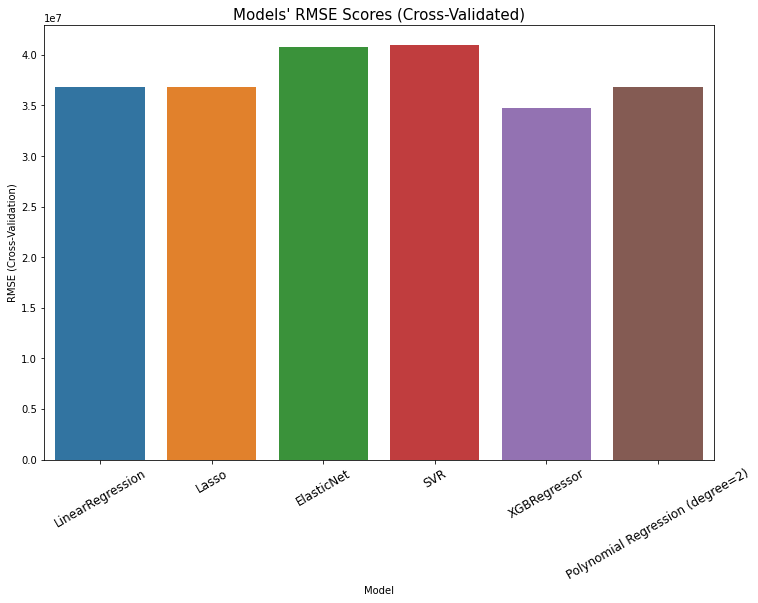

In [26]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE (Cross-Validation)"])
plt.title("Models' RMSE Scores (Cross-Validated)", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Further analysis of DecisionTree Regressor

## Tree plot

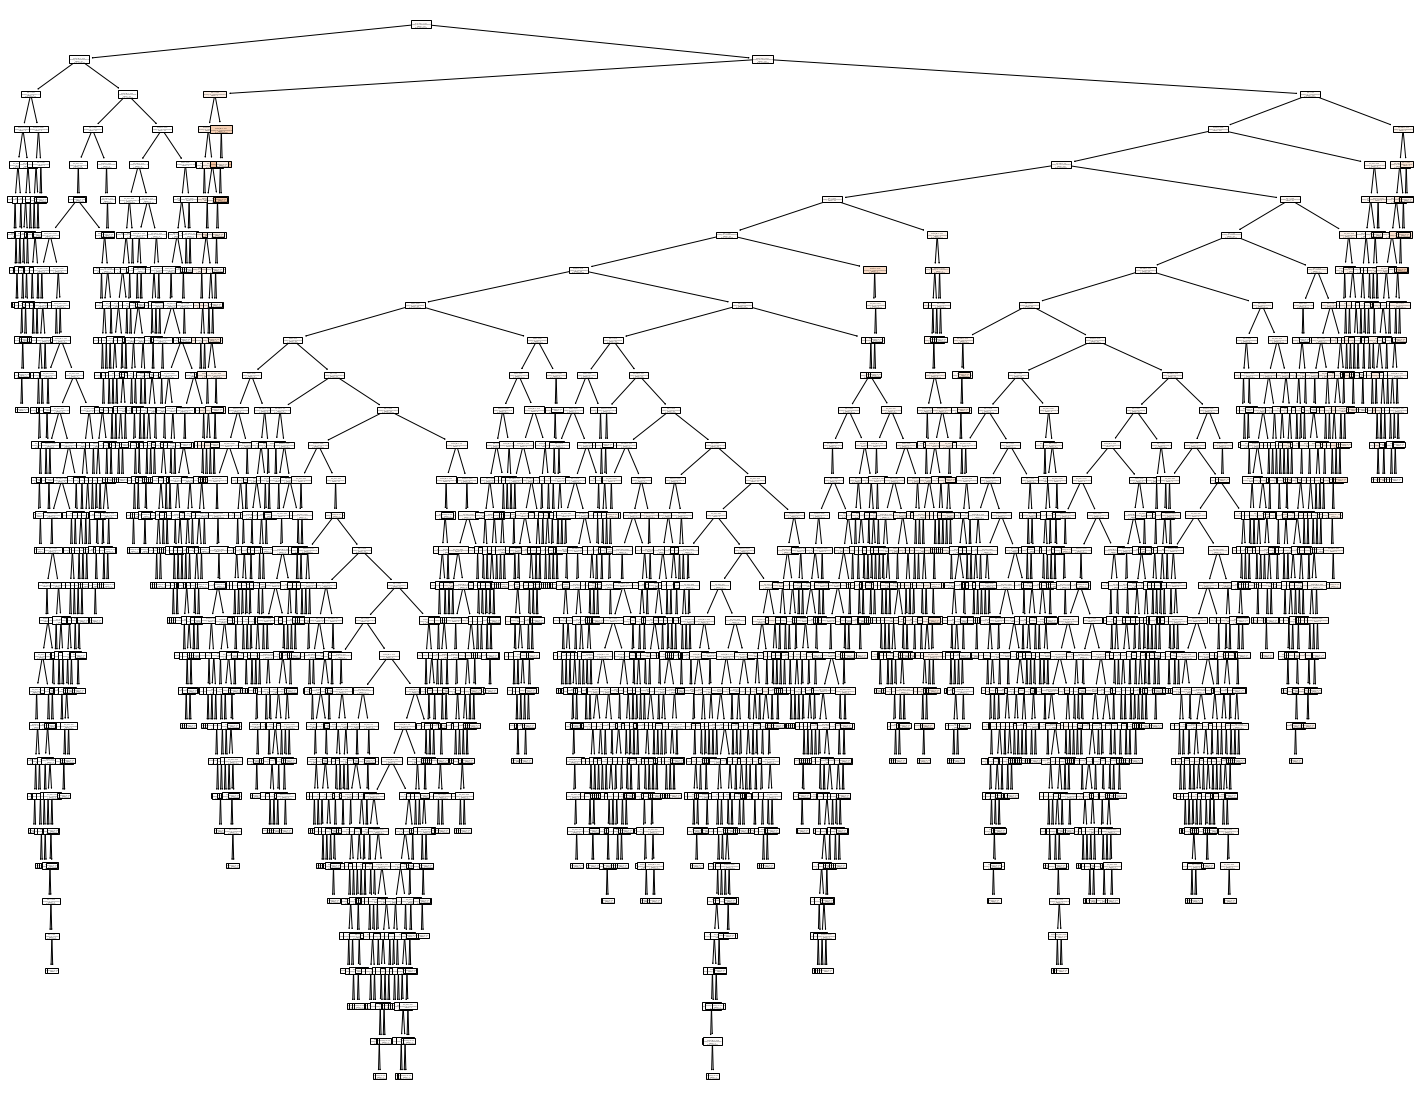

In [27]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_reg, 
                   feature_names=features_names,  
                   class_names=target_name,
                   filled=True)

In [28]:
print("Depth of the tree : ", tree_reg.get_depth())

Depth of the tree :  30


### Analyzing rmse scores at different depth

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

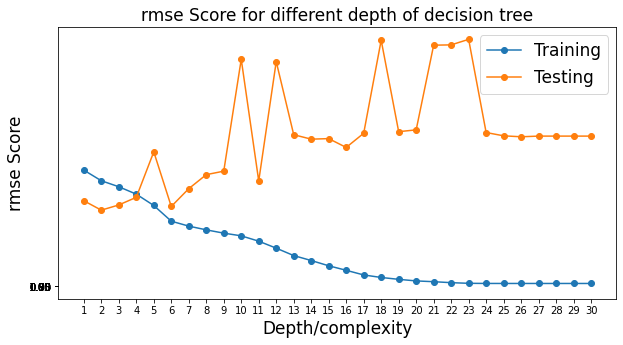

In [33]:
train_scores = []
test_scores = []

for i in range(1, tree_reg.get_depth() + 1):
    model = DecisionTreeRegressor(random_state=RANDOM_STATE, max_depth=i).fit(x_train, ytrain)
    
    y_pred_train = model.predict(x_train)
    train_scores.append(np.sqrt(mean_squared_error(ytrain, y_pred_train)))
    
    y_pred = model.predict(x_test)
    test_scores.append(np.sqrt(mean_squared_error(ytest, y_pred)))

max_test_score = np.argmax(test_scores) + 1
# Plot of depth vs accuracy
depth = tree_reg.get_depth()
plt.figure(figsize = (10,5))    
plt.plot(np.arange(1, depth+1, 1), train_scores, marker = 'o', label = 'Training')
plt.plot(np.arange(1, depth+1, 1), test_scores, marker = 'o', label = "Testing")
plt.plot([max_test_score,max_test_score], [0.7, 1.0], '--', color = 'black', alpha = 0.5)
plt.xlabel("Depth/complexity", fontsize = 17)
plt.ylabel("rmse Score", fontsize = 17)
plt.title("rmse Score for different depth of decision tree", fontsize = 17)
plt.xticks(np.arange(1, depth+1, 1)) 
plt.yticks(np.arange(0.7, 1.05, 0.05))
plt.legend(fontsize = 17)
plt.show()    

### Analyzing graph for optimal depth

In [37]:
optimal_depth = 9

In [39]:
tree_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=RANDOM_STATE).fit(x_train, ytrain)

y_pred_train = tree_model.predict(x_train)
print("Train : ")
accuracy_check(ytrain, y_pred_train)

y_pred = tree_model.predict(x_test)
print("Test : ")
accuracy_check(ytest, y_pred)

Train : 
MAE :  8854213.808320597  RMSE :  18405438.508044
Test : 
MAE :  17365265.34816101  RMSE :  39812555.855202906


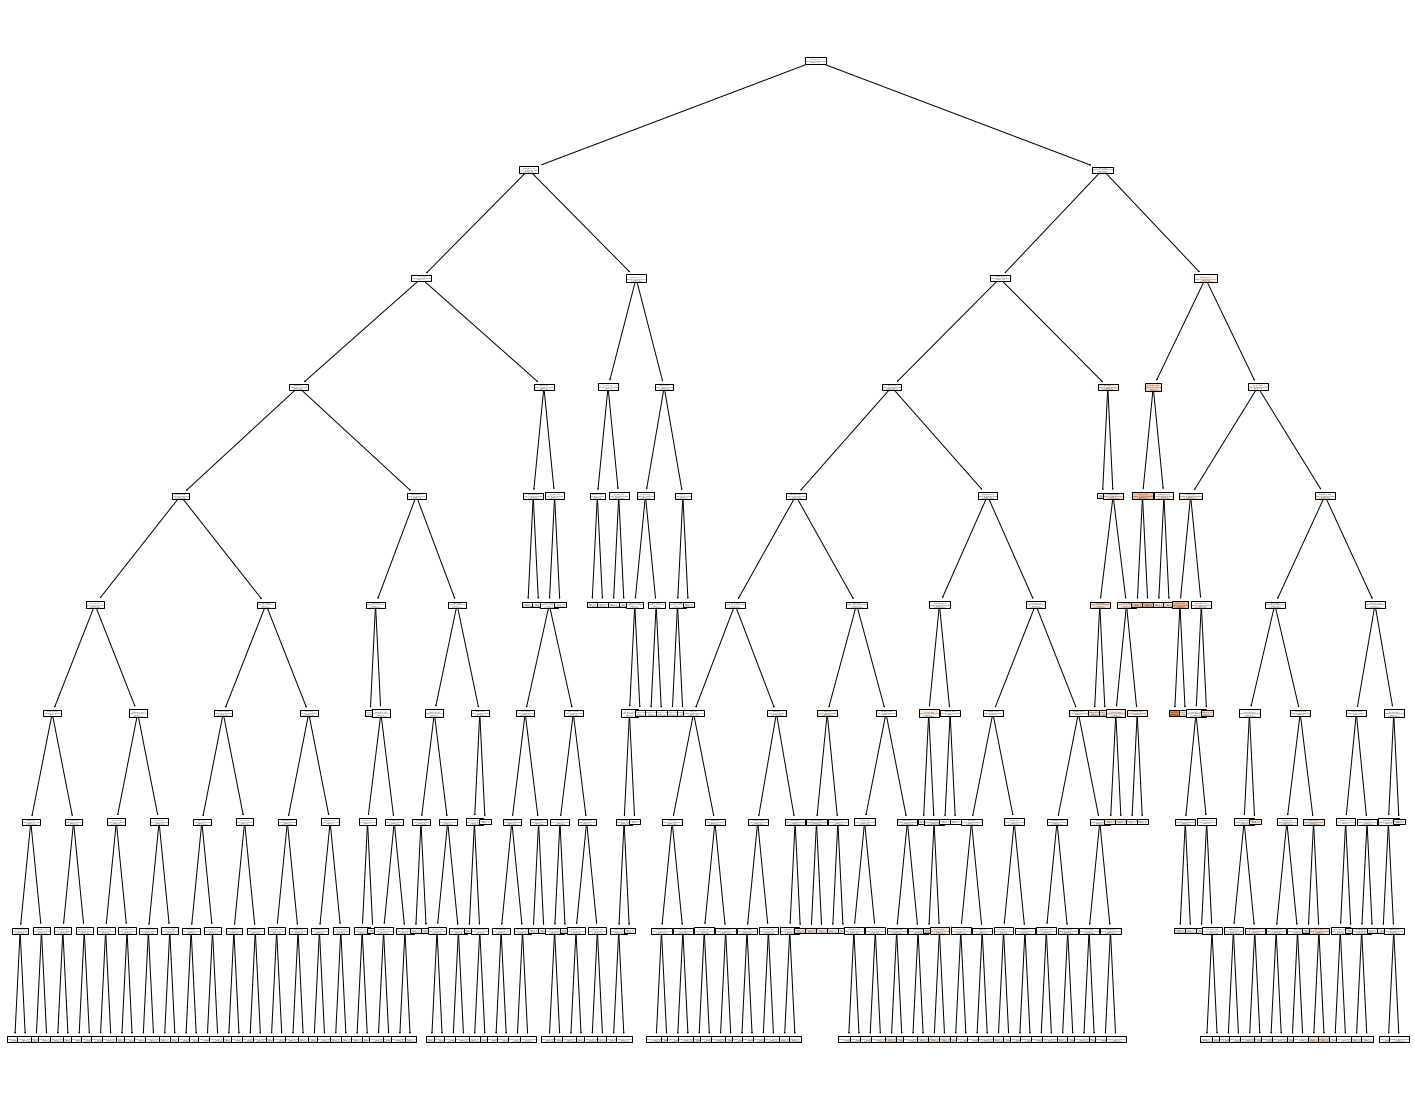

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=features_names,  
                   class_names=target_name,
                   filled=True)

### Setting depth = 4

In [41]:
optimal_depth = 4

In [42]:
tree_model = DecisionTreeRegressor(max_depth=optimal_depth, random_state=RANDOM_STATE).fit(x_train, ytrain)

y_pred_train = tree_model.predict(x_train)
print("Train : ")
accuracy_check(ytrain, y_pred_train)

y_pred = tree_model.predict(x_test)
print("Test: ")
accuracy_check(ytest, y_pred)

Train : 
MAE :  14162600.462726567  RMSE :  31872853.328242734
Test: 
MAE :  15111571.42480205  RMSE :  30779935.516948428


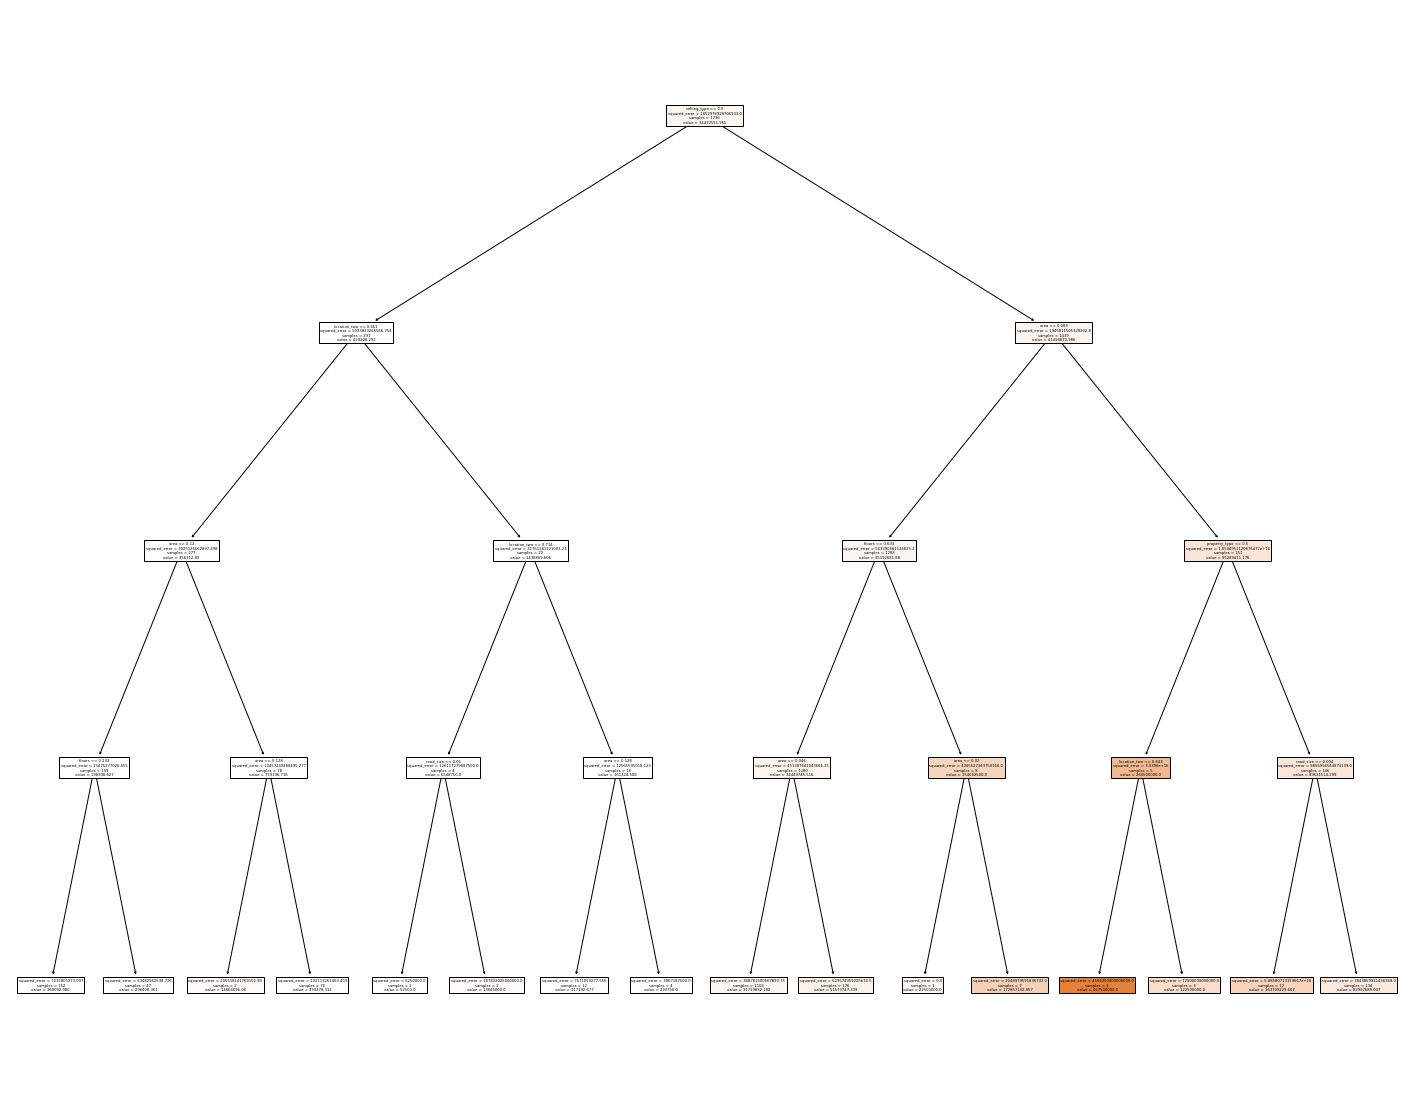

In [43]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_model, 
                   feature_names=features_names,  
                   class_names=target_name,
                   filled=True)

### Cost Complexity Pruning

In [44]:
path = tree_reg.cost_complexity_pruning_path(x_train, ytrain)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total impurity vs effective alpha for training set')

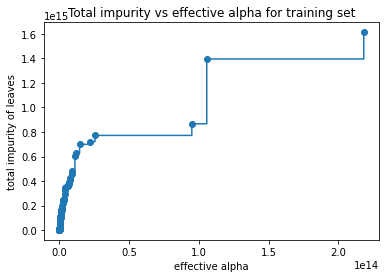

In [45]:
fig, ax = plt.subplots()

ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total impurity vs effective alpha for training set")

In [46]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, ytrain)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 5 with ccp_alpha: 239199393178446.0


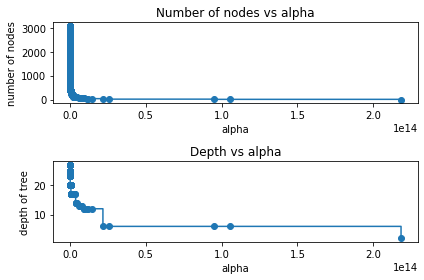

In [47]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

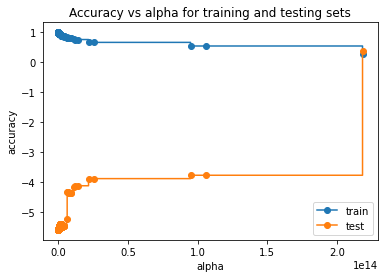

In [48]:
train_scores = [clf.score(x_train, ytrain) for clf in clfs]
test_scores = [clf.score(x_test, ytest) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [49]:
index = np.argmax(test_scores)
best_alpha = ccp_alphas[index]

clf = DecisionTreeRegressor(random_state=RANDOM_STATE, ccp_alpha=best_alpha)
clf.fit(x_train, ytrain)
y_pred_train = clf.predict(x_train)
print("Train : ")
accuracy_check(ytrain, y_pred_train)

y_pred_test = clf.predict(x_test)
print("Test : ")
accuracy_check(ytest, y_pred_test)

Train : 
MAE :  15937821.649784531  RMSE :  36504764.51023395
Test : 
MAE :  15086762.255947577  RMSE :  26348474.073599145


### Let's try boosting, weak learners are also the best sometimes to get good ones

In [50]:
from sklearn.ensemble import AdaBoostRegressor

### Reshaping target for AdaBoost

In [51]:
ada_ytrain = ytrain.reshape((len(ytrain), ))

In [52]:
adaBoost_regr = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=300, random_state=RANDOM_STATE)

adaBoost_regr.fit(x_train, ada_ytrain)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=4),
                  n_estimators=300, random_state=7)

In [53]:
predtrain = adaBoost_regr.predict(x_train)
predtest = adaBoost_regr.predict(x_test)

### accuracy

In [54]:
print("Train: ")
accuracy_check(ytrain, predtrain)

print("Test: ")
accuracy_check(ytest, predtest)

Train: 
MAE :  21730656.754997972  RMSE :  27683938.785011593
Test: 
MAE :  22414431.804786094  RMSE :  29619543.817187026
